# Deep Nueral Network for Binary Classification for HotDog or Not-HotDog

In this code we implement a Deep Nueral network with $ReLu$ activation functions for all hidden layers and $Sigmoid ~ (\sigma(Z))$ activation function for the output layer. 

In [1]:
import time
import numpy as np
from numpy import loadtxt
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_helper_func import *  ##dnn_helper_func.py contains all functions needed to run and iterate the nueral network

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#np.random.seed(1)

In [10]:
##load data sets
num_px = 64  ##Images are 64x64 

train_set_x_flatten = loadtxt('seefood_train_x.csv', delimiter=',')
train_set_y_flatten = loadtxt('seefood_train_y.csv', delimiter=',')
train_set_y         = train_set_y_flatten.reshape(1,train_set_y_flatten.size)

test_set_x_flatten  = loadtxt('seefood_test_x.csv', delimiter=',')
test_set_y_flatten  = loadtxt('seefood_test_y.csv', delimiter=',')
test_set_y          = test_set_y_flatten.reshape(1,test_set_y_flatten.size)

train_set_x = train_set_x_flatten/255.
test_set_x  = test_set_x_flatten/255.

print("train_set_x shape = " + str(train_set_x.shape))
print("train_set_y shape = " + str(train_set_y.shape))
print("test_set_x shape = " + str(test_set_x.shape))
print("test_set_y shape = " + str(test_set_y.shape))

train_set_x shape = (12288, 748)
train_set_y shape = (1, 748)
test_set_x shape = (12288, 250)
test_set_y shape = (1, 250)


In [11]:
### CONSTANTS ###
layers_dims = [12288, 20, 10, 3, 1] #  4-layer model

In [17]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    #np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
        
        #Break statement to prevent overfitting. 
        if cost < 0.1:
            break
        
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.696376
Cost after iteration 100: 0.691647
Cost after iteration 200: 0.689590
Cost after iteration 300: 0.687012
Cost after iteration 400: 0.682058
Cost after iteration 500: 0.672089
Cost after iteration 600: 0.658885
Cost after iteration 700: 0.642683
Cost after iteration 800: 0.625683
Cost after iteration 900: 0.608508
Cost after iteration 1000: 0.589492
Cost after iteration 1100: 0.610350
Cost after iteration 1200: 0.643232
Cost after iteration 1300: 0.554464
Cost after iteration 1400: 0.471912
Cost after iteration 1500: 0.538108
Cost after iteration 1600: 0.426342
Cost after iteration 1700: 0.508069
Cost after iteration 1800: 0.596702
Cost after iteration 1900: 0.372826
Cost after iteration 2000: 0.377022
Cost after iteration 2100: 0.303446
Cost after iteration 2200: 0.341129
Cost after iteration 2300: 0.242489
Cost after iteration 2400: 0.268140
Cost after iteration 2500: 0.462694
Cost after iteration 2600: 0.464554
Cost after iteration 2700: 0.204308
Cost

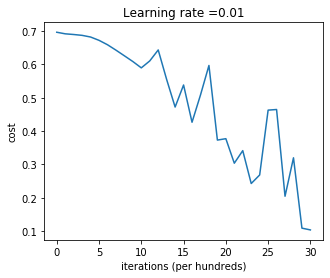

In [16]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 6000, print_cost = True)

In [18]:
def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str((np.sum((p == y)/m))*100) + "%")
        
    return p

In [19]:
pred_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 98.66310160427807%


In [20]:
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 55.60000000000001%


The system is prone to overfitting to the data and does not perform well with test data. 